### **MACHINE LEARNING APPROACHES TO UNDERSTAND SUICIDE  CAUSES AND PATTERNS IN INDIA**


---

Project By - Alaissa Shaikh

F.Y. M.Sc. Data Science Student

In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

UNDERSTANDING LIBRARIES


*   pandas: For data manipulation and analysis.
*   matplotlib.pyplot and seaborn: For data visualization.
*   train_test_split: For splitting the data into training and testing sets.
*   LinearRegression: For performing linear regression.
*   mean_squared_error: For evaluating regression models.
*   DecisionTreeClassifier: For performing classification using decision trees.
*   classification_report: For evaluating classification models.
*   GridSearchCV: For hyperparameter tuning.
*   RandomForestClassifier: For performing classification using random forests.
*   SVC: For performing classification using support vector machines.

In [ ]:
#importing dataset
data = pd.read_csv('/content/ML_Project_Sucide_Dataset.csv')

In [ ]:
data.head()

,ROWID,Country,State lgd code,State,YearCode,Year,Cause of suicide,Gender,Number of suicides,Percentage share
0,1,India,1,Jammu And Kashmir,2004,"Calendar Year (Jan - Dec), 2004",Bankruptcy or Indebtedness,Female,0.0,0.0
1,2,India,1,Jammu And Kashmir,2004,"Calendar Year (Jan - Dec), 2004",Bankruptcy or Indebtedness,Male,0.0,0.0
2,3,India,1,Jammu And Kashmir,2004,"Calendar Year (Jan - Dec), 2004",Causes Not Known,Female,13.0,17.0
3,4,India,1,Jammu And Kashmir,2004,"Calendar Year (Jan - Dec), 2004",Causes Not Known,Male,6.0,17.0
4,5,India,1,Jammu And Kashmir,2004,"Calendar Year (Jan - Dec), 2004",Death of Dear Person,Female,0.0,0.0


DATASET OVERVIEW

Breakdown of suicide cases, offering a detailed categorization of incidents based on the reasons or causes prompting individuals to take their own lives, organized according to specific states or Union Territories (UTs).


*   Source Ministry/ Department/ Organisation - Ministry of Home Affairs
Collection
*   Sector - Home affairs & National Security
*   Year Range - CY 2004 - CY 2022
*   Link to data - https://ndap.niti.gov.in/dataset/9386

In [ ]:
#data entries and features
data.shape

(46816, 10)

In [ ]:
#unique cases count present in the dataset
unique_causes_count = data['Cause of suicide'].nunique()
unique_causes_count

30

In [ ]:
#unique causes of suicide in India
unique_causes = data['Cause of suicide'].unique()
print("Unique causes of suicide:")
for cause in unique_causes:
    print(cause)

Unique causes of suicide:
Bankruptcy or Indebtedness
Causes Not Known
Death of Dear Person
Drug Abuse/Alcoholic Addiction
Failure in Examination
Fall in Social Reputation
Family Problems
Ideological Causes/Hero Worshipping
Illegitimate Pregnancy (Other than Extra Marital Affairs)
Illness (AIDS/STD)
Illness (Cancer)
Illness (Insanity/Mental illness)
Illness (Other Prolonged Illness)
Illness (Paralysis)
Impotency/Infertility
Love Affairs
Marriage Related Issues (Divorce)
Marriage Related Issues (Dowry Related Issues)
Marriage Related Issues (Non-Settlement of Marriage)
Other Causes
Physical Abuse (Rape, etc.)
Poverty
Professional/Career Problem
Property Dispute
Suspected/ Illicit Relation (Other than Extra Marital Affairs)
Unemployment
Illness (Total)
Marriage Related Issues (Extra Marital affairs)
Marriage Related Issues (Others)
Marriage Related Issues (Total)


In [ ]:
#handling missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 ROWID                     0
Country                   0
State lgd code            0
State                     0
YearCode                  0
Year                      0
Cause of suicide          0
Gender                    0
Number of suicides       52
Percentage share      28724
dtype: int64


In [ ]:
data_1 = data.dropna(subset=['Number of suicides'])

In [ ]:
#datatypes
data_1.dtypes

ROWID                   int64
Country                object
State lgd code          int64
State                  object
YearCode                int64
Year                   object
Cause of suicide       object
Gender                 object
Number of suicides    float64
Percentage share      float64
dtype: object

In [ ]:
#data describe
data_1.describe()

,ROWID,State lgd code,YearCode,Number of suicides,Percentage share
count,46764.000000,46764.000000,46764.000000,46764.000000,18092.000000
mean,23407.421393,18.763151,2014.327645,64.416688,3.812718
std,13522.232751,10.973227,5.375544,335.815500,8.917524
min,1.000000,1.000000,2004.000000,0.000000,0.000000
25%,11691.750000,9.000000,2010.000000,0.000000,0.000000
50%,23382.500000,18.000000,2015.000000,1.000000,0.600000
75%,35125.250000,29.000000,2019.000000,18.000000,2.600000
max,46816.000000,38.000000,2022.000000,34574.000000,100.000000


In [ ]:
#top 10 causes of suicides
causewise_suicides = data_1.groupby('Cause of suicide')['Number of suicides'].sum().sort_values(ascending=False)
top_10_causes = causewise_suicides.head(10)
print("Top 10 causes of suicides:")
print(top_10_causes)

Top 10 causes of suicides:
Cause of suicide
Family Problems                      738059.0
Other Causes                         391616.0
Causes Not Known                     356028.0
Illness (Other Prolonged Illness)    284730.0
Illness (Total)                      255733.0
Illness (Insanity/Mental illness)    193992.0
Drug Abuse/Alcoholic Addiction       104378.0
Love Affairs                          97813.0
Bankruptcy or Indebtedness            79835.0
Marriage Related Issues (Total)       74082.0
Name: Number of suicides, dtype: float64


In [ ]:
#top 10 years with the highest number of suicides
yearly_suicides = data_1.groupby('YearCode')['Number of suicides'].sum().sort_values(ascending=False)
top_10_years = yearly_suicides.head(10)
print("Top 10 years with the highest number of suicides:")
print(top_10_years)

Top 10 years with the highest number of suicides:
YearCode
2020    371550.0
2022    210572.0
2021    202382.0
2019    170548.0
2018    166564.0
2014    162185.0
2015    161213.0
2017    161071.0
2016    160299.0
2011    135585.0
Name: Number of suicides, dtype: float64


In [ ]:
#top 10 states with the lowest number of suicides
statewise_suicides = data_1.groupby('State')['Number of suicides'].sum().sort_values(ascending=True)
bottom_10_states = statewise_suicides.head(10)
print("Top 10 states with the lowest number of suicides:")
print(bottom_10_states)

Top 10 states with the lowest number of suicides:
State
Lakshadweep                      38.0
Ladakh                           43.0
Nagaland                        644.0
Manipur                         771.0
Mizoram                        1883.0
Chandigarh                     2129.0
Arunachal Pradesh              2538.0
Meghalaya                      3008.0
Andaman And Nicobar Islands    3380.0
Sikkim                         4780.0
Name: Number of suicides, dtype: float64




---


### Exploratory Data Analysis (EDA)

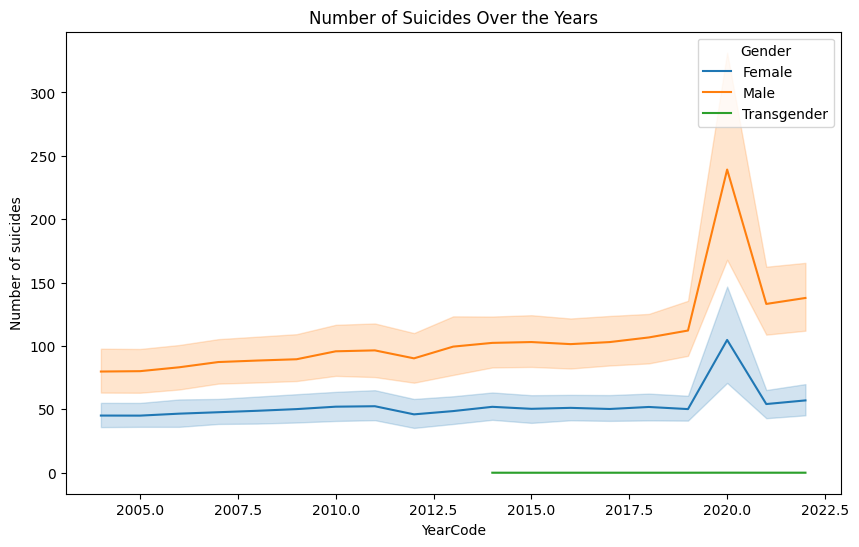

In [ ]:
#distribution of suicides over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_1, x='YearCode', y='Number of suicides', hue='Gender')
plt.title('Number of Suicides Over the Years')
plt.show()


INTERPRETATION


~   The graph shows a general trend for each gender over time, allowing us to see how the number of suicides has changed year by year.

~   There is a spike around for males, reaching above 300 suicides, while for females, it is above 150 suicides. This could be due to external factors such as the COVID-19 pandemic, which might have had a significant impact on mental health and suicides.

~   Males consistently have a higher number of suicides compared to females over the years, which is a common finding in suicide data globally.

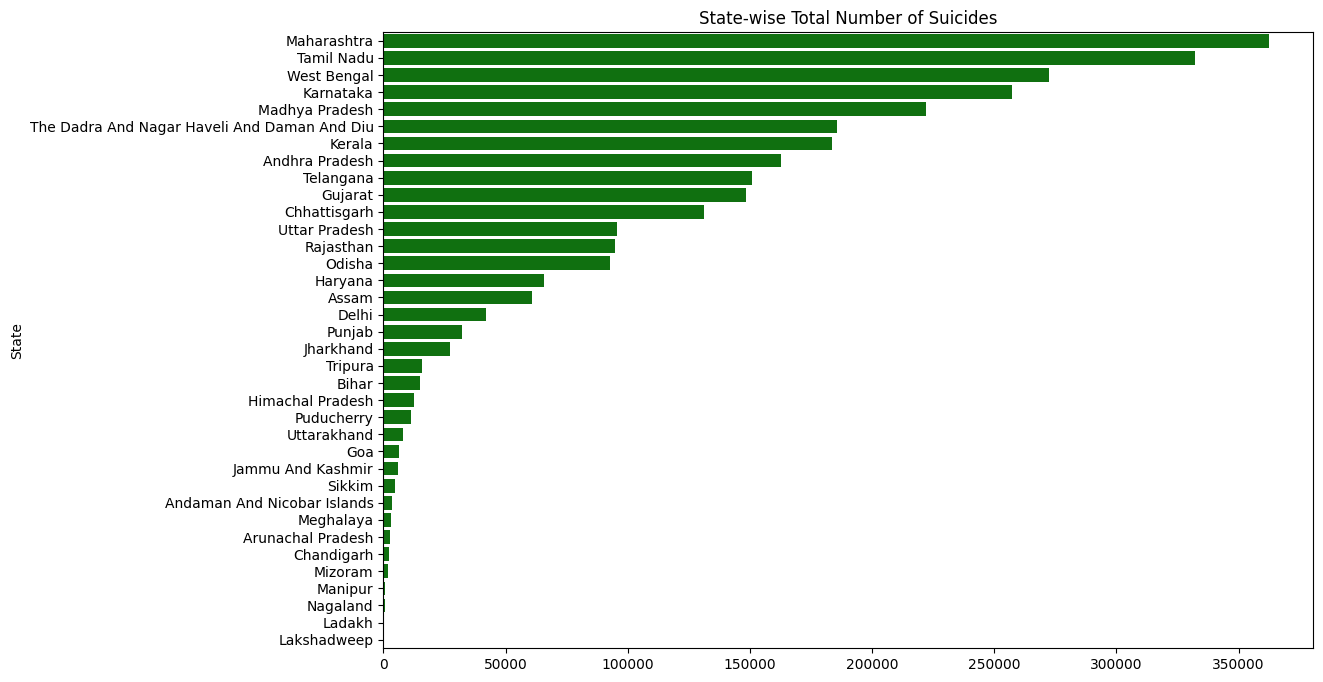

In [ ]:
#state-wise analysis
statewise_suicides = data_1.groupby('State')['Number of suicides'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=statewise_suicides.values, y=statewise_suicides.index, color='green')
plt.title('State-wise Total Number of Suicides')
plt.show()



1.   **Top States with Highest Suicides:** Maharashtra, Tamil Nadu, West Bengal, Karnataka, Madhya Pradesh.

1.   **States with Moderate Suicides:**
Kerala, Andhra Pradesh, Telangana, Gujarat, Chhattisgarh, Uttar Pradesh

1.   **States with Lower Suicides:**
Punjab, Jharkhand, Tripura, Bihar, Himachal Pradesh, Puducherry, Uttarakhand, Goa



<ipython-input-185-3a2f37621dd3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genderwise_suicides.index, y=genderwise_suicides.values, palette=colors)


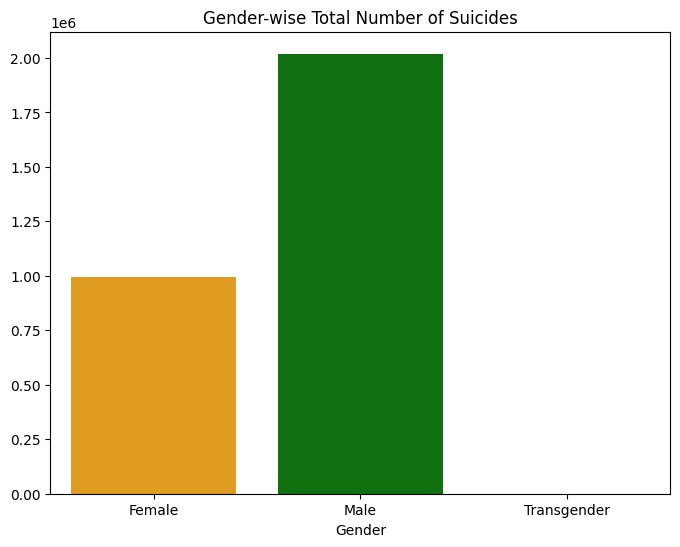

In [ ]:
#gender analysis
genderwise_suicides = data_1.groupby('Gender')['Number of suicides'].sum()
colors = ['orange', 'green', 'blue']
plt.figure(figsize=(8, 6))
sns.barplot(x=genderwise_suicides.index, y=genderwise_suicides.values, palette=colors)
plt.title('Gender-wise Total Number of Suicides')
plt.show()

KEY INSIGHTS


*   The data indicates that males have a significantly higher number of suicides compared to females and transgender individuals.

*   Lower Recorded Suicides Among Transgender Individuals




In [ ]:
#creating a dataframe including states and gender
state_gender_suicides = data_1.groupby(['State', 'Gender'])['Number of suicides'].sum().unstack()
state_gender_suicides = state_gender_suicides.fillna(0)
state_gender_suicides = state_gender_suicides.reset_index()
state_gender_suicides.head()

Gender,State,Female,Male,Transgender
0,Andaman And Nicobar Islands,971.000000,2409.000000,0.0
1,Andhra Pradesh,51417.271306,111157.094459,15.0
2,Arunachal Pradesh,735.000000,1803.000000,0.0
3,Assam,18698.000000,42023.000000,0.0
4,Bihar,6584.000000,8380.000000,0.0


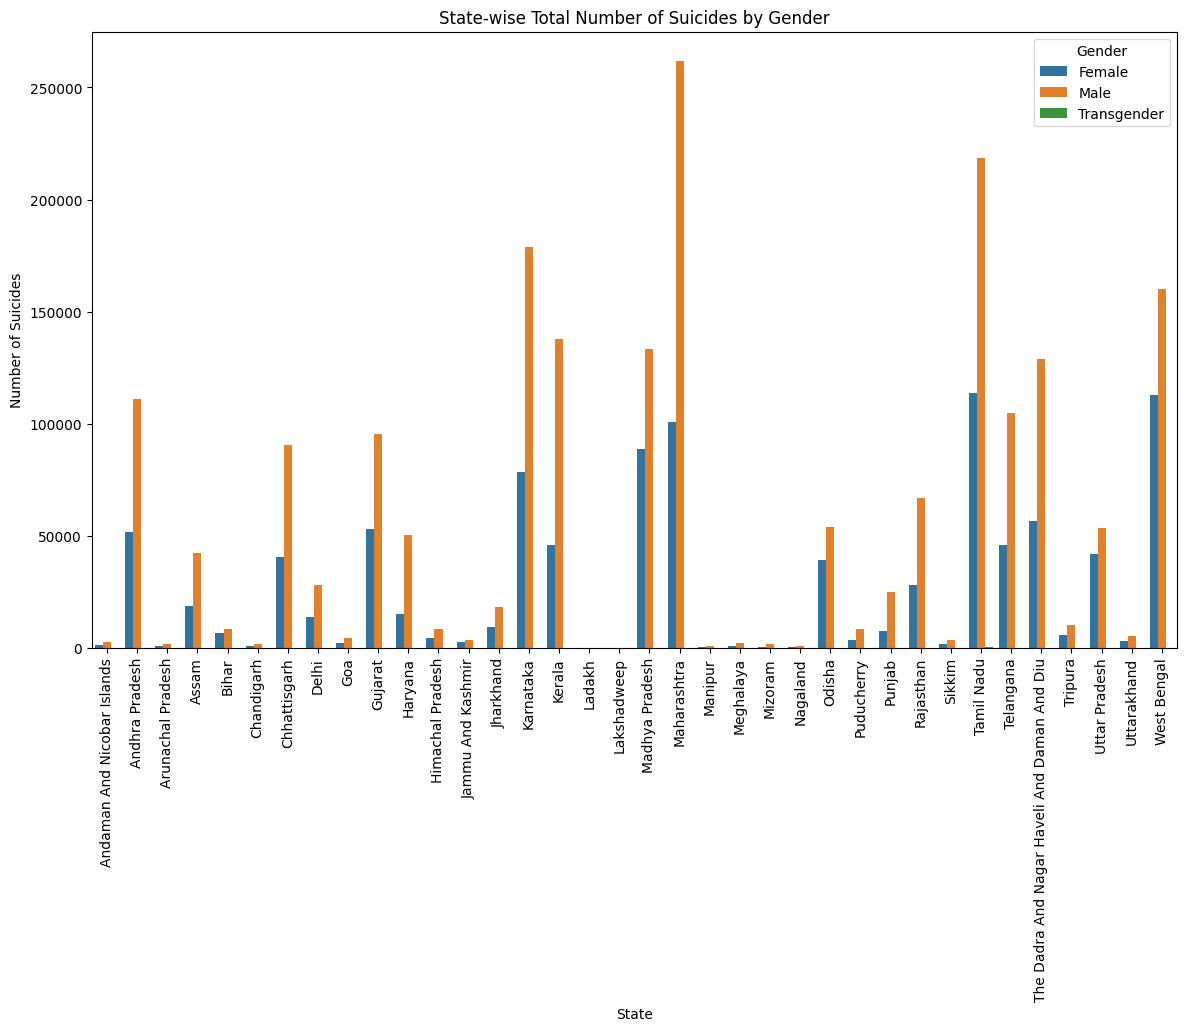

In [ ]:
#plotting a side-by-side bar chart for states and gender
melted_df = state_gender_suicides.melt(id_vars='State', var_name='Gender', value_name='Number of Suicides')
plt.figure(figsize=(14, 8))
sns.barplot(data=melted_df, x='State', y='Number of Suicides', hue='Gender')
plt.title('State-wise Total Number of Suicides by Gender')
plt.xlabel('State')
plt.ylabel('Number of Suicides')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.show()



*   In most states, the number of male suicides (orange bars) is significantly higher than female suicides (blue bars).

*   Maharashtra shows the highest number of suicides for both males and females.


*   States with the highest numbers of suicides, such as Maharashtra, Tamil Nadu, and West Bengal, might require targeted mental health interventions and support systems.






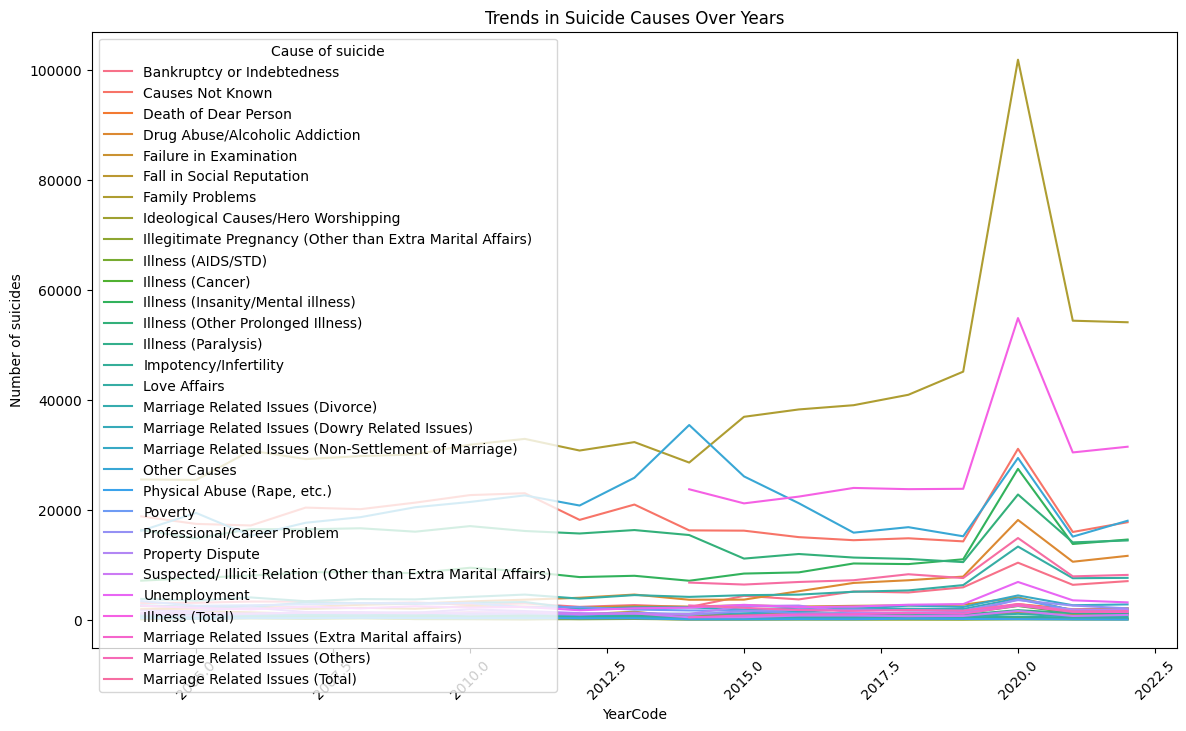

In [ ]:
#analyzing trends in suicide causes over ears
cause_trends = data_1.groupby(['YearCode', 'Cause of suicide'])['Number of suicides'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.lineplot(data=cause_trends, x='YearCode', y='Number of suicides', hue='Cause of suicide')
plt.title('Trends in Suicide Causes Over Years')
plt.xticks(rotation=45)
plt.show()



---


---




# **BUILDING MODELS AND ALGORITHMS**



---

## **IMPORTANT DISCLAIMER**:
*   This analysis's dataset sheds light on the trends and causes of suicides in India. Because suicide is a complicated and diverse issue, forecasting future trends based on this data may not yield completely accurate findings, but these predictions can still provide helpful insight.
*   Policymakers, mental health practitioners, and communities can adopt more timely and efficient preventive actions by having a better understanding of prospective patterns.
*   These forecasts should be approached cautiously because a variety of factors can affect such delicate results.

---



### **STATISTICAL MODEL: ARIMA MODEL**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
data['Year'] = data['Year'].str.extract('(\d{4})')
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)

Assuming 'Year' contains strings like "Calendar Year (Jan - Dec), 2004" therefor we need to extract the year part.

In [ ]:
#resampling the data annually (summing up the suicides if data contains multiple entries per year)
annual_suicides = data['Number of suicides'].resample('Y').sum()

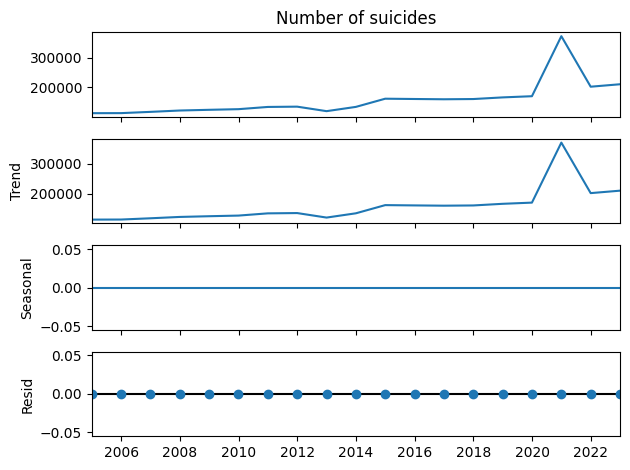

In [ ]:
#creating seasonal decomposition to analyze trends, seasonality, and residuals
decomposition = seasonal_decompose(annual_suicides, model='additive')
decomposition.plot()
plt.show()

In [ ]:
#preparing data for ARIMA model and fitting the ARIMA model
model = ARIMA(annual_suicides, order=(1, 1, 1))
model_fit = model.fit()

#forecasting the next 5 years
forecast = model_fit.forecast(steps=5)
print(forecast)

2023-12-31    224977.654459
2024-12-31    223932.947263
2025-12-31    224008.710091
2026-12-31    224003.215723
2027-12-31    224003.614178
Freq: A-DEC, Name: predicted_mean, dtype: float64


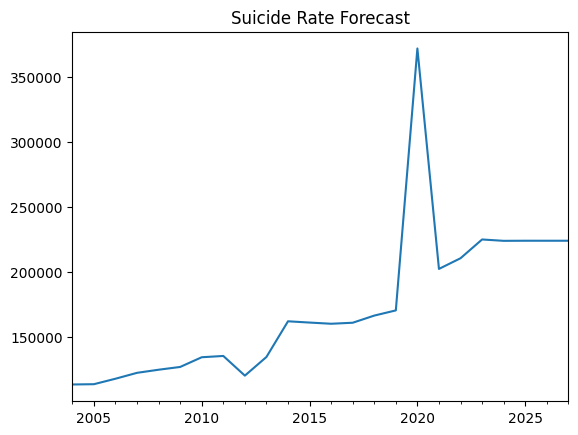

In [ ]:
#plotting the forecast alongside the historical data
pd.concat([annual_suicides, forecast]).plot()
plt.title('Suicide Rate Forecast')
plt.show()